<a href="https://colab.research.google.com/github/antonio2505/Data_Science_Business_CS/blob/main/Decision_Trees_for_Kyphosis_Disease_Classification_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CODE TO CLASSIFY KYPHOSIS DISEASE USING DECISION TREES AND RANDOM FOREST CLASSIFIER
# Mr. Kassi Antoine



# PROBLEM STATEMENT

- Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output

INPUTS: 
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUTS:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.


- Link to the dataset: https://www.kaggle.com/abbasit/kyphosis-dataset

- Source: John M. Chambers and Trevor J. Hastie eds. (1992) Statistical Models in S, Wadsworth and Brooks/Cole, Pacific Grove, CA.

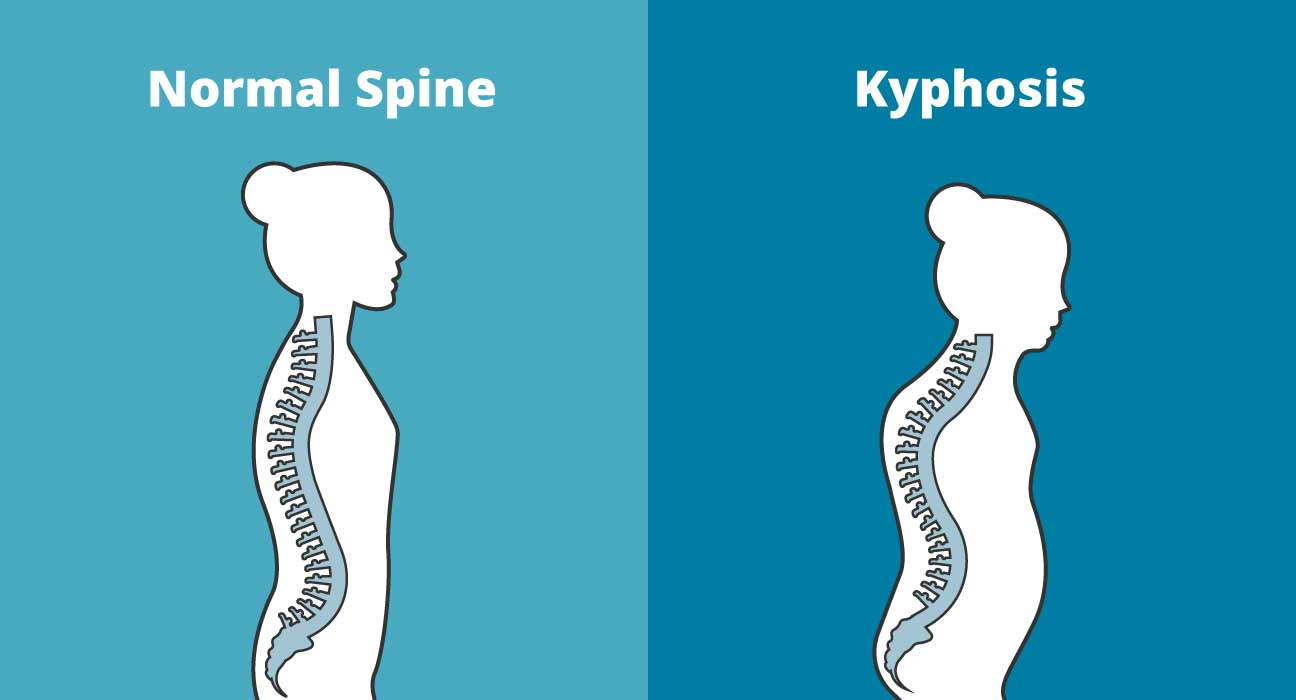

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [2]:
from google.colab import files
file = files.upload()

Saving kyphosis.csv to kyphosis.csv


In [3]:
df = pd.read_csv("kyphosis.csv")

In [4]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


# STEP #2: VISUALIZE DATASET

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


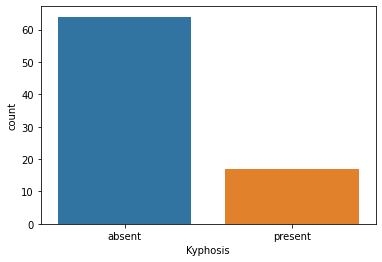

In [7]:
sns.countplot(df['Kyphosis'], label = 'count')

In [8]:
df.head(2)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14


In [10]:
df['Kyphosis'] = df['Kyphosis'].apply(lambda x:1 if x == 'present' else 0)

In [11]:
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [12]:
present = df[df['Kyphosis']==1] 
absent = df[df['Kyphosis']==0]

In [13]:
present

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12
24,1,15,7,2
37,1,52,5,6
39,1,91,5,12
40,1,73,5,1
45,1,139,3,10


In [14]:
absent

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16
...,...,...,...,...
74,0,11,3,15
75,0,178,4,15
77,0,26,7,13
78,0,120,2,13


In [18]:
print('Desease Present after the Operation precenage ', round(len(present)/len(df), 2) * 100,'%')
print('Desease Absent after the Operation precenage ', round(len(absent)/len(df), 2) * 100,'%')

Desease Present after the Operation precenage  21.0 %
Desease Absent after the Operation precenage  79.0 %


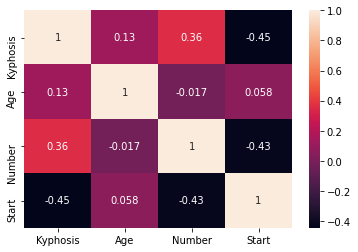

In [19]:
sns.heatmap(df.corr(), annot=True)

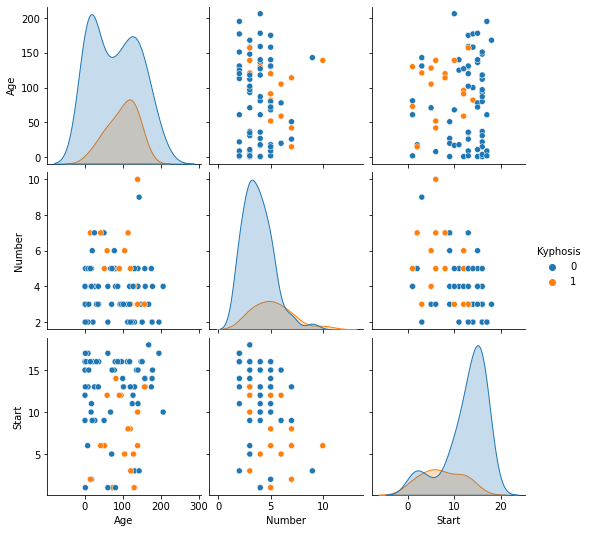

In [21]:
sns.pairplot(df, hue='Kyphosis')

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [23]:
df.head(2)

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14


In [36]:
x = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [37]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [38]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

# STEP#4: TRAINING THE MODEL

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [40]:
x_test.shape

(25, 3)

In [41]:
x_train.shape

(56, 3)

In [42]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
x_train.columns

Index(['Age', 'Number', 'Start'], dtype='object')

In [47]:
#find the most import importance features in the train set 
feature_importances = pd.DataFrame(classifier.feature_importances_, index=x_train.columns , columns=['Importances']).sort_values('Importances',ascending=False)

In [48]:
feature_importances

,Importances
Start,0.547212
Age,0.395426
Number,0.057361


# STEP#5: EVALUATING THE MODEL 

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

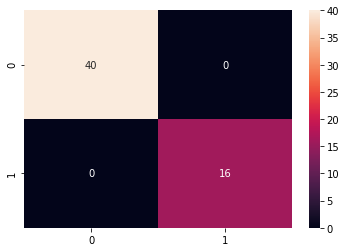

In [51]:
y_pred_train = classifier.predict(x_train)
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)

In [53]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        16

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



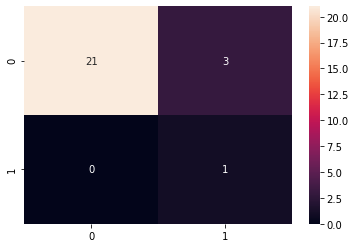

In [54]:
y_pred_test = classifier.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)

In [55]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.25      1.00      0.40         1

    accuracy                           0.88        25
   macro avg       0.62      0.94      0.67        25
weighted avg       0.97      0.88      0.91        25



# STEP#6: IMPROVING THE MODEL 

In [70]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=100)
RandomForest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

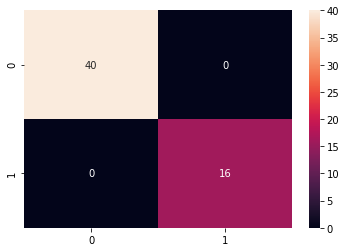

In [71]:
y_pred_train = RandomForest.predict(x_train)
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)

In [72]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        16

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



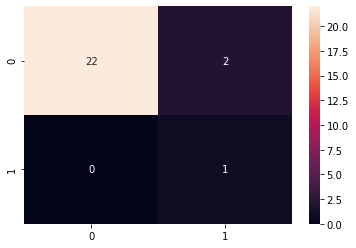

In [73]:
y_pred_test = RandomForest.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)

In [74]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.33      1.00      0.50         1

    accuracy                           0.92        25
   macro avg       0.67      0.96      0.73        25
weighted avg       0.97      0.92      0.94        25



# EXCELLENT JOB! 